In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression,f_oneway

In [2]:
credit_data=pd.read_excel(r"C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/1. Predicting Credit Card Spend & Identifying Key Drivers/Data Set.xlsx")

In [3]:
credit_data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [5]:
credit_data.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

Creating Dependent column

In [6]:
credit_data['total_spend']=credit_data['cardspent']+credit_data['card2spent']

Droping out the cardspent, crad2spent and custid

In [7]:
credit_data.drop(["cardspent","card2spent","custid"],axis=1, inplace=True)

Categorical List

In [8]:
cat_var=['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat',
         'default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown','cartype',
         'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool',
         'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
         'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
         'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
         'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
         'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
         'response_03']

In [9]:
numerical_var=[]
for i in credit_data.columns:
    if i not in cat_var:
        numerical_var.append(i)
print(numerical_var)        

['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'total_spend']


In [10]:
print ('Number of numerical variables   :-  {}'.format(len(numerical_var)))
print ('Number of categorical variables :-  {}'.format(len(cat_var)))

Number of numerical variables   :-  44
Number of categorical variables :-  84


In [11]:
#Convert a list in to dataframe 
#Information about numericvariable in custdata_df

credit_data_num=credit_data[numerical_var]
credit_data_num.head(5)

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [12]:
#Convert a list in to dataframe 
#Information about categorical variable in custdata_df

credit_data_cat=credit_data[cat_var]
credit_data_cat.head(5)


,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,...,1,0,1,0,1,0,0,0,1,0


#### Create Data audit Report for continuous variables and categorical variables

In [13]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [14]:
credit_data_num.apply(lambda x: continuous_var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,1.849955e+04,3.699909,3.637586,0.747072,5.581164e-01,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,1.0,-6.521372e+02,-0.130454,-0.076106,1.273058,1.620678e+00,-6.597334,-3.401690,-2.291604,-1.737842,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,0.000000,0.114299,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,1.0,3.483879e+03,0.696915,0.741537,1.128578,1.273689e+00,-4.092107,-2.168241,-1.243483,-0.780312,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
spoused,5000.0,0.0,3.056400e+04,6.112800,-1.000000,7.743518,5.996207e+01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,24.000000


In [15]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [16]:
credit_data_cat.apply(lambda x: categorical_var_summary(x)).T

,N,NMISS,MODE,FREQ,PERCENT
region,5000,0,5,1027,20.54
townsize,4998,2,1,1436,28.73
gender,5000,0,1,2518,50.36
agecat,5000,0,4,1222,24.44
birthmonth,5000,0,September,458,9.16
...,...,...,...,...,...
ownfax,5000,0,0,4106,82.12
news,5000,0,0,2637,52.74
response_01,5000,0,0,4582,91.64
response_02,5000,0,0,4351,87.02


#### Handling Outliers-
There are some extreame high or extream low value which need to rectify.

In [17]:
#Handling Outliers for numerical data - Through function

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [18]:
credit_data_num = credit_data_num.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [19]:
credit_data_num.describe()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,...,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,1344.000000,5000.000000,1344.000000,5000.00000,5000.000000
mean,47.025600,14.544200,53.629900,3.697049,9.914120,1.758369,-0.127780,3.522506,0.698386,6.095400,...,15.266950,2.909082,707.239096,6.429558,10.53027,3.604226,409.960020,6.808151,19.62660,493.435286
std,17.770338,3.242553,46.567698,0.738495,6.241691,2.380681,1.241398,4.221760,1.104530,7.709565,...,14.156339,0.555100,848.339901,1.146504,19.02128,0.382289,930.007398,1.273410,5.11922,322.795315
min,18.000000,8.000000,9.000000,2.197225,0.700000,0.033160,-3.401690,0.114299,-2.168241,-1.000000,...,0.000000,1.658228,0.000000,2.484907,0.00000,2.806811,0.000000,3.039749,0.00000,58.197600
25%,31.000000,12.000000,24.000000,3.178054,5.100000,0.385520,-0.952685,0.980301,-0.018987,-1.000000,...,0.000000,2.545531,0.000000,5.857933,0.00000,3.330417,0.000000,6.158091,17.00000,276.282500
50%,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,...,13.750000,2.904165,425.000000,6.639876,0.00000,3.597997,0.000000,7.147185,20.00000,414.250000
75%,62.000000,17.000000,67.000000,4.204693,13.600000,2.063820,0.724665,4.314780,1.462053,14.000000,...,22.750000,3.295837,1080.000000,7.218910,20.96250,3.865193,89.962500,7.755376,23.00000,615.562500
max,79.000000,21.000000,272.010000,5.605839,29.200000,14.280358,2.658910,24.064260,3.180802,20.000000,...,64.250000,4.239162,4011.200000,8.392151,78.30400,4.577186,4530.186000,8.690117,31.00000,1760.102400


#### Handling Missing Values

In [20]:
def missing_imputation(x):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) 
    else:
        x = x.fillna(x.mode())
    return x

In [21]:
credit_data_num = credit_data_num.apply(lambda x: missing_imputation(x))

In [22]:
credit_data_num.isnull().sum()

age               0
ed                0
income            0
lninc             0
debtinc           0
creddebt          0
lncreddebt        0
othdebt           0
lnothdebt         0
spoused           0
reside            0
pets              0
pets_cats         0
pets_dogs         0
pets_birds        0
pets_reptiles     0
pets_small        0
pets_saltfish     0
pets_freshfish    0
carvalue          0
commutetime       0
tenure            0
longmon           0
lnlongmon         0
longten           0
lnlongten         0
tollmon           0
lntollmon         0
tollten           0
lntollten         0
equipmon          0
lnequipmon        0
equipten          0
lnequipten        0
cardmon           0
lncardmon         0
cardten           0
lncardten         0
wiremon           0
lnwiremon         0
wireten           0
lnwireten         0
hourstv           0
total_spend       0
dtype: int64

In [23]:
credit_data_cat=credit_data_cat.apply(lambda x: missing_imputation(x))

In [24]:
credit_data_cat.isnull().sum()

region         0
townsize       0
gender         0
agecat         0
birthmonth     0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 84, dtype: int64

#### Dummy creation for categorical data

In [25]:
cat_dummies=pd.get_dummies(credit_data_cat, drop_first=True)

In [26]:
cat_dummies

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,1,2.0,1,2,3,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5,5.0,0,2,4,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,4.0,1,6,2,2,0,16,5,0,...,0,0,0,0,1,0,0,0,0,0
3,4,3.0,0,2,3,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,2.0,0,3,3,2,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,24,5,0,...,0,0,1,0,0,0,0,0,0,0
4996,3,3.0,0,5,2,1,0,6,3,0,...,0,0,0,0,0,0,1,0,0,0
4997,4,5.0,0,6,4,1,0,24,5,0,...,0,0,0,0,0,0,0,0,0,0
4998,1,1.0,0,4,4,2,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0


#### Merge Numerical and categorical data

In [27]:
credit_data=pd.concat([credit_data_num,cat_dummies], axis=1)

In [28]:
credit_data.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,0,0,0,0,0,0,0,0,0,1
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,0,0,0,0,0,0,1,0,0,0
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,0,0,0,0,1,0,0,0,0,0
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,...,0,0,0,0,0,0,1,0,0,0
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,0,0,0,1,0,0,0,0,0,0


#### Assumptions check for Linear Regression---- Normality

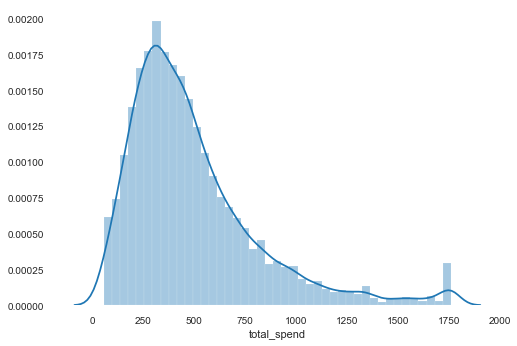

In [29]:
sns.distplot(credit_data.total_spend)
plt.show()

This distribution is highly skewed (Left side), it means graph is not noramaly distributed, so we have to perform log Transformation. 

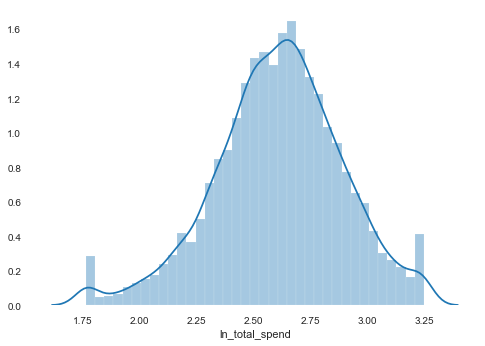

In [30]:
# apply log transformation: log is rescalling the data and making the distribution normal
credit_data['ln_total_spend'] = np.log10(credit_data['total_spend'])
sns.distplot(credit_data.ln_total_spend)
plt.show()

#### Multicollinearity Check (Variable Reduction)

In [31]:
credit_data.corrwith(credit_data.ln_total_spend).tail(60)

commutenonmotor        -0.011806
telecommute            -0.002980
reason                 -0.016180
polview                 0.014732
polparty                0.005300
polcontrib              0.033357
vote                    0.055833
card                   -0.237335
cardtype               -0.000077
cardbenefit            -0.020091
cardfee                -0.008539
cardtenure              0.053348
cardtenurecat           0.074785
card2                  -0.077231
card2type              -0.009000
card2benefit           -0.001248
card2fee               -0.019724
card2tenure             0.057018
card2tenurecat          0.068026
active                 -0.004454
bfast                   0.028510
churn                   0.019357
tollfree                0.054323
equip                   0.052631
callcard                0.021515
wireless                0.074040
multline                0.045315
voice                   0.044980
pager                   0.057861
internet                0.073999
callid    

In [32]:
x_new=['retire','income','lninc','inccat','creddebt','lncreddebt','othdebt','lnothdebt','othdebt','lnothdebt','carvalue','carcatvalue','card','ownvcr','owndvd','owncd','lnwireten','lnequipmon']
x_new

['retire',
 'income',
 'lninc',
 'inccat',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'othdebt',
 'lnothdebt',
 'carvalue',
 'carcatvalue',
 'card',
 'ownvcr',
 'owndvd',
 'owncd',
 'lnwireten',
 'lnequipmon']

In [33]:
credit_data.corr()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,ln_total_spend
age,1.000000,-0.093966,0.208286,0.142984,0.039031,0.142401,0.108046,0.154514,0.127005,-0.002796,...,0.019207,-0.005793,0.020012,0.010682,0.013504,-0.017742,0.008049,-0.029846,-0.012905,0.007270
ed,-0.093966,1.000000,0.186802,0.206332,0.013871,0.122362,0.129920,0.135869,0.154458,0.113928,...,-0.021278,0.009659,-0.002186,0.001654,-0.008574,-0.020765,0.016814,0.025154,-0.008178,0.098077
income,0.208286,0.186802,1.000000,0.898172,0.011586,0.627578,0.531251,0.696227,0.597843,0.035491,...,0.009556,0.004544,-0.008630,0.012303,0.010886,-0.014965,0.017384,-0.013342,-0.023206,0.355851
lninc,0.142984,0.206332,0.898172,1.000000,0.013177,0.566972,0.583808,0.636798,0.666062,0.045417,...,0.011939,0.008085,-0.017805,0.008463,0.023549,-0.016726,0.019900,-0.019693,-0.022445,0.404878
debtinc,0.039031,0.013871,0.011586,0.013177,1.000000,0.462598,0.552941,0.526964,0.628006,-0.040150,...,-0.001494,-0.001875,-0.021354,0.008257,0.015922,0.015206,-0.005337,-0.006364,0.010513,0.016104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
birthmonth_May,-0.017742,-0.020765,-0.014965,-0.016726,0.015206,-0.012854,-0.003540,-0.007133,-0.004423,0.007515,...,-0.095102,-0.095350,-0.094480,-0.095350,-0.094854,1.000000,-0.092724,-0.094106,-0.099986,-0.003625
birthmonth_November,0.008049,0.016814,0.017384,0.019900,-0.005337,0.008394,0.011676,0.010572,0.007948,-0.010538,...,-0.088945,-0.089177,-0.088363,-0.089177,-0.088712,-0.092724,1.000000,-0.088013,-0.093512,0.007104
birthmonth_October,-0.029846,0.025154,-0.013342,-0.019693,-0.006364,-0.001872,-0.009550,-0.007339,-0.016601,0.023441,...,-0.090271,-0.090506,-0.089680,-0.090506,-0.090035,-0.094106,-0.088013,1.000000,-0.094906,-0.000069
birthmonth_September,-0.012905,-0.008178,-0.023206,-0.022445,0.010513,-0.007734,-0.005090,-0.016628,-0.007339,0.000657,...,-0.095911,-0.096161,-0.095284,-0.096161,-0.095661,-0.099986,-0.093512,-0.094906,1.000000,-0.007363


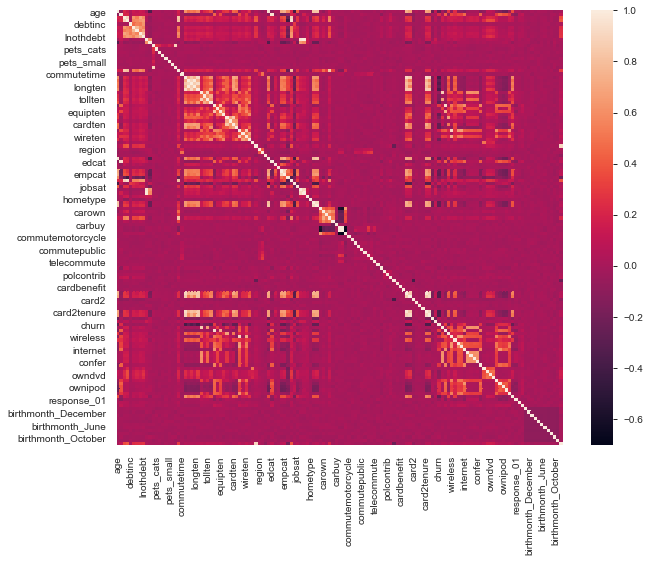

In [34]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(credit_data.corr())

#### Feature Selection

F-Regression

In [35]:
features= credit_data.columns.difference(['total_spend','ln_total_spend'])

In [36]:
x=credit_data[features]

In [37]:
y=credit_data['ln_total_spend']

In [38]:
f_values, p_values  = f_regression(x,y)

In [39]:
f_reg_result = pd.concat([pd.Series(x.columns), pd.Series(f_values), pd.Series(p_values)], axis=1)
f_reg_result.columns = ['Feature', 'f_Value', 'p_Value']
f_reg_result.sort_values('f_Value', ascending=False, inplace=True)

In [40]:
f_reg_result
f_reg_result.to_csv('C:/Users/gaura/OneDrive/Desktop/f_reg_results.csv')

In [41]:
f_reg_results_new = f_reg_result[f_reg_result.p_Value < 0.1]

In [42]:
f_reg_results_new

,Feature,f_Value,p_Value
81,lninc,979.942213,1.360998e-196
71,inccat,850.969533,6.778116e-173
72,income,724.662085,3.587817e-149
40,carvalue,519.265495,1.944039e-109
84,lnothdebt,405.411648,9.294081e-87
...,...,...,...
93,news,4.459036,3.476659e-02
5,bfast,4.065689,4.381621e-02
33,cardten,4.050659,4.420764e-02
120,response_02,3.600705,5.781265e-02


#### RFE - Recursive Feature Elimination

In [43]:
RFE_model = RFE(LinearRegression(), n_features_to_select=45)
# Generally use 1/3  no of variables "n_features_to_select"
RFE_model= RFE_model.fit(x, y)

In [44]:
x.columns
# RFE drops the insignificant variables

Index(['active', 'address', 'addresscat', 'age', 'agecat', 'bfast',
       'birthmonth_August', 'birthmonth_December', 'birthmonth_February',
       'birthmonth_January',
       ...
       'tollfree', 'tollmon', 'tollten', 'townsize', 'union', 'voice', 'vote',
       'wireless', 'wiremon', 'wireten'],
      dtype='object', length=137)

In [45]:
RFE_model.get_support()

array([ True, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,

In [46]:
RFE_model.ranking_

array([ 1, 58,  5, 56, 29, 67, 10,  1,  1, 45,  1,  1, 49, 46, 48,  8, 47,
        1, 17, 84,  1,  1,  1,  1,  1, 60,  1, 80, 54, 63, 89, 18, 85, 87,
       81,  1, 64,  1, 52, 35, 77,  1,  1,  1, 21,  1,  1,  1, 70,  1,  2,
       20, 76, 15, 16, 69, 78,  1,  1, 65,  9, 28, 88, 25, 26, 90, 66,  1,
        4,  3, 72, 19, 91,  1,  7, 27,  1, 13, 30,  1, 12,  1, 11,  1, 36,
       57, 74,  1,  1, 71, 86,  1, 31, 82, 73, 33,  1,  1, 24, 55, 38, 75,
        1, 23,  1, 41,  1, 39, 40, 42,  1,  1, 59,  1, 37, 34, 61, 14, 79,
       32, 62,  1,  6,  1,  1, 22, 68, 53, 83, 92, 44,  1,  1, 51, 43, 50,
       93])

In [47]:
RFE_selected_Cols = x.columns[list(RFE_model.get_support())]

In [48]:
pd.Series(RFE_selected_Cols)

0                  active
1     birthmonth_December
2     birthmonth_February
3         birthmonth_July
4         birthmonth_June
5                callcard
6               carbought
7                  carbuy
8             carcatvalue
9                    card
10                  card2
11               card2fee
12          cardtenurecat
13                 carown
14                  churn
15                commute
16            commutebike
17             commutecar
18         commutecarpool
19             commutecat
20        commutenonmotor
21                default
22                  ebill
23                 gender
24               internet
25              lncardmon
26             lnequipmon
27                  lninc
28              lnlongten
29              lnwiremon
30              lnwireten
31                marital
32                 owndvd
33                 ownfax
34                  owntv
35                  pager
36             pets_birds
37          pets_reptiles
38          

#### SlectKBase

In [49]:
selectkbest = SelectKBest(f_oneway, k=45)
# Generally use 1/3  no of variables "k"
selectkbest = selectkbest.fit(x,y)

In [50]:
selectkbest.get_support()

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False,

In [51]:
selectKbest_Cols = x.columns[list(selectkbest.get_support())]

In [52]:
pd.Series(selectKbest_Cols)

0        birthmonth_August
1      birthmonth_December
2      birthmonth_February
3       birthmonth_January
4          birthmonth_July
5          birthmonth_June
6         birthmonth_March
7           birthmonth_May
8      birthmonth_November
9       birthmonth_October
10    birthmonth_September
11                card2fee
12                 cardfee
13                   churn
14             commutebike
15          commutecarpool
16       commutemotorcycle
17         commutenonmotor
18           commutepublic
19             commuterail
20                 default
21                   equip
22              lnequipten
23               lntollten
24               lnwireten
25                   owncd
26                  owndvd
27                  ownfax
28                  ownpda
29                   owntv
30                  ownvcr
31                   pager
32              pets_birds
33           pets_reptiles
34           pets_saltfish
35              pets_small
36              polcontrib
3

In [53]:
#so got the final variables from the tests(Corr Data, F-Regression, RFE & SelectKBase) (Merging & Removing Duplicates)
x_new=x[['retire','income','lninc','inccat','creddebt','lncreddebt','othdebt','lnothdebt','carvalue','carcatvalue','card','ownvcr','owndvd','owncd','lnwireten','lnequipmon','ed','wireten','empcat','edcat','wiremon','tollten','owntv','equipten','gender','card2','tollmon','cardtenurecat','addresscat','carown','wireless','internet','equipmon','ownpda','homeown','employ','lntollten','card2tenurecat','jobsat','ownfax','response_03','lntollmon','lnlongten','pager','card2tenure','callwait','vote','callid','confer','tollfree','cardtenure','tenure','lnequipten','equip','forward','lnwiremon','address','multline','voice','lnlongmon','hourstv','ownpc','owngame','ownipod','region','spousedcat','longmon','longten','polcontrib','ebill','lncardten','spoused','agecat','news','bfast','cardten','birthmonth_August','birthmonth_December','birthmonth_February','birthmonth_January','birthmonth_July','birthmonth_June','birthmonth_March','birthmonth_May','birthmonth_November','birthmonth_October','birthmonth_September','card2fee','cardfee','churn','commutebike','commutecarpool','commutemotorcycle','commutenonmotor','commutepublic','commuterail','default','pets_birds','pets_reptiles','pets_saltfish','pets_small','response_01','response_02','telecommute','union'
]]

VIF-Reducing further list of variables (By remove multicollinierity)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [55]:
x_new=x_new[x_new.columns.difference(['lnequipmon','lnwiremon','lntollmon','lnwireten','lnequipten','lntollten','lninc','lnlongten','equipmon','lnlongmon','longmon','equip','ed','wiremon','tollmon','wireless','longten','tollfree','lncardten','card2tenurecat','tenure','cardtenurecat','card2tenure','owntv','edcat','addresscat','cardtenure','inccat','agecat','spoused','spousedcat','empcat','tollten','wireten','income','equipten','carvalue','address','owncd','hourstv','carcatvalue','ownvcr','owndvd','employ','jobsat','card2','othdebt','bfast','card','lnothdebt','cardten','creddebt','region','carown','ownpc','confer','birthmonth_August', 'birthmonth_December', 'birthmonth_February',
       'birthmonth_January', 'birthmonth_July', 'birthmonth_June',
       'birthmonth_March', 'birthmonth_May', 'birthmonth_November',
       'birthmonth_October', 'birthmonth_September', 'callid', 'callwait',
       'card2fee', 'cardfee'
])]

In [56]:
VIF=[variance_inflation_factor(x_new.values,i)for i in range(x_new.shape[1])]

dropping features having VIF>5

In [57]:
VIF_results=pd.concat([pd.Series(x_new.columns),pd.Series(VIF)],axis=1)
VIF_results.columns=['Fearures','VIF_Values']
VIF_results.sort_values('VIF_Values', ascending=False, inplace=True)
VIF_results

,Fearures,VIF_Values
12,internet,3.115582
32,voice,2.798339
17,owngame,2.686726
8,ebill,2.675693
14,multline,2.619100
20,pager,2.596205
18,ownipod,2.592437
11,homeown,2.416515
9,forward,2.363214
15,news,2.161555


In [58]:
x_final=x_new

In [59]:
##Final list of columns to be included in the model
x_final.columns

Index(['churn', 'commutebike', 'commutecarpool', 'commutemotorcycle',
       'commutenonmotor', 'commutepublic', 'commuterail', 'default', 'ebill',
       'forward', 'gender', 'homeown', 'internet', 'lncreddebt', 'multline',
       'news', 'ownfax', 'owngame', 'ownipod', 'ownpda', 'pager', 'pets_birds',
       'pets_reptiles', 'pets_saltfish', 'pets_small', 'polcontrib',
       'response_01', 'response_02', 'response_03', 'retire', 'telecommute',
       'union', 'voice', 'vote'],
      dtype='object')

#### Split the data into train & test

In [95]:
train_X,test_X,train_y,test_y=train_test_split(x_final,y,
                                               test_size=.25,
                                               random_state=123)

In [96]:
train_X.columns

Index(['churn', 'commutebike', 'commutecarpool', 'commutemotorcycle',
       'commutenonmotor', 'commutepublic', 'commuterail', 'default', 'ebill',
       'forward', 'gender', 'homeown', 'internet', 'lncreddebt', 'multline',
       'news', 'ownfax', 'owngame', 'ownipod', 'ownpda', 'pager', 'pets_birds',
       'pets_reptiles', 'pets_saltfish', 'pets_small', 'polcontrib',
       'response_01', 'response_02', 'response_03', 'retire', 'telecommute',
       'union', 'voice', 'vote'],
      dtype='object')

In [105]:
import statsmodels.api as sm

In [145]:
train_X = sm.add_constant(train_X)
test_X=sm.add_constant(test_X)
lm=sm.OLS(train_y,train_X).fit()

In [108]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     14.97
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           6.09e-80
Time:                        13:33:54   Log-Likelihood:                -360.08
No. Observations:                3750   AIC:                             790.2
Df Residuals:                    3715   BIC:                             1008.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6101      0.01

In [109]:
lm.pvalues.sort_values(ascending=False)

churn                9.111834e-01
telecommute          8.680456e-01
polcontrib           8.106810e-01
commuterail          7.792710e-01
response_01          7.088868e-01
pager                7.085663e-01
ownipod              6.000645e-01
owngame              5.942731e-01
pets_small           5.860747e-01
pets_saltfish        5.498933e-01
union                5.418958e-01
commutepublic        5.264170e-01
response_02          5.059004e-01
ownpda               4.864211e-01
ebill                3.898362e-01
multline             3.676519e-01
commutemotorcycle    3.393450e-01
commutenonmotor      3.121519e-01
forward              1.656103e-01
pets_birds           1.636934e-01
pets_reptiles        1.505573e-01
ownfax               1.499662e-01
homeown              1.452543e-01
commutecarpool       1.210484e-01
response_03          1.055509e-01
vote                 7.772616e-02
voice                7.349463e-02
commutebike          2.024997e-02
news                 1.418164e-02
default       

In [129]:
clf_rf.feature_importances_
list(zip(train_X.columns,clf_rf.feature_importances_ ))

[('const', 0.0),
 ('churn', 0.020381848457205566),
 ('commutebike', 0.018549687786550997),
 ('commutecarpool', 0.02424622674596161),
 ('commutemotorcycle', 0.019443130309240577),
 ('commutenonmotor', 0.011010590125929223),
 ('commutepublic', 0.014382804624637877),
 ('commuterail', 0.02457186231128102),
 ('default', 0.018303875332626555),
 ('ebill', 0.018007211043482404),
 ('forward', 0.024840731176803247),
 ('gender', 0.027221751403665118),
 ('homeown', 0.024066470394700792),
 ('internet', 0.05055875675444411),
 ('lncreddebt', 0.3363674266429518),
 ('multline', 0.024775564161819454),
 ('news', 0.02332955536473532),
 ('ownfax', 0.01417874282097917),
 ('owngame', 0.021681906096757516),
 ('ownipod', 0.023721528732107103),
 ('ownpda', 0.015059816814733342),
 ('pager', 0.01448053312466589),
 ('pets_birds', 0.017221872783830618),
 ('pets_reptiles', 0.010519329952538969),
 ('pets_saltfish', 0.0011503584285031624),
 ('pets_small', 0.01635175143050532),
 ('polcontrib', 0.02354027377743567),
 ('

In [111]:
test_pred=lm.predict(test_X)
train_pred=lm.predict(train_X)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 0.06761773873376475
MSE Train: 0.07094629349948745


In [112]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.2040642056833914
MSE: 0.06761773873376475
RMSE: 0.2600341107119694


In [113]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.083  |  MAPE of testing data:  0.080


#### Checking if residuals are normally distributed

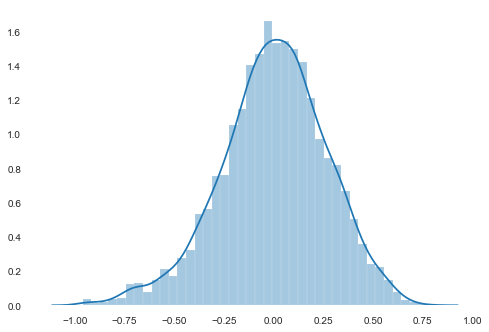

In [154]:
residuals=train_y-train_pred
sns.distplot(residuals)


In [155]:
train=pd.concat([train_X,train_y],axis=1)
test=pd.concat([test_X,test_y],axis=1)
train=sm.add_constant(train)
train['pred_tot_spend'] = lm.predict(train_X)
test=sm.add_constant(test)
test['pred_tot_spend'] = lm.predict(test_X)

In [159]:
# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_tot_spend'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_tot_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_tot_spend']
Actual_avg = train[['Deciles', 'ln_total_spend']].groupby(train.Deciles).mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_train= pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()
Decile_analysis_train.to_csv('Decile_analysis_train')
Decile_analysis_train

,Deciles,pred_tot_spend,ln_total_spend
0,9,2.758014,2.793610
1,8,2.703297,2.693032
2,7,2.672121,2.663847
3,6,2.647824,2.617290
4,5,2.624739,2.610890
5,4,2.600458,2.602324
6,3,2.573895,2.576365
7,2,2.542584,2.552871
8,1,2.495201,2.495749
9,0,2.412859,2.425014


In [162]:
# Decile Analysis for test data
test['Deciles'] = pd.qcut(test['pred_tot_spend'], 10, labels = False)
Predicted_avg = test[['Deciles', 'pred_tot_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_tot_spend']
Actual_avg = test[['Deciles', 'ln_total_spend']].groupby(test.Deciles).mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_test= pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()
Decile_analysis_test.to_csv('Decile_analysis_test')
Decile_analysis_test

,Deciles,pred_tot_spend,ln_total_spend
0,9,2.760103,2.746112
1,8,2.706655,2.664840
2,7,2.674404,2.683150
3,6,2.650378,2.660236
4,5,2.627950,2.618693
5,4,2.606477,2.614133
6,3,2.582164,2.594545
7,2,2.552134,2.574493
8,1,2.508746,2.573709
9,0,2.429705,2.489899
